# Introduction
The nobel prizes are awarded annually to individuals and organizations who make outstanding contributions in the fields of chemistry, physics, literature, peace, and physiology or medicine. The first Prize was awarded in in 1901.
In this project we will find out more about nobel prozes, like what are the winners characteristics? How many winners awarded in a year? Which country gets the prize most often? Is there any winners gotten it twice? and more. The data set is used from kaggle 
We will try to answer these questions during our analysis:
1. The most Nobel of Prizes
2. who gets the Nobel Prize?
3. USA dominance
4. USA dominance, visualized
5. What is the gender of a typical Nobel Prize winner?
6. The first woman to win the Nobel Prize
7. Repeat laureates
8. How old are you when you get the prize?
9. Age differences between prize categories
10. Oldest and youngest winners


In [1]:
#First we need to import all nessary libraries 
import yfinance as yf
import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import html5lib
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
#read the csv file and save it in dataframe
data = pd.read_csv('archive 2.csv')
data.head(3)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


In [3]:
#check the number of data
data.shape

(969, 18)

In [4]:
data.size

17442

In [5]:
#check the data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [6]:
#We can find out about some quick statistics about the data with 
data.describe()

,Year,Laureate ID
count,969.000000,969.000000
mean,1970.287926,470.152735
std,32.937498,274.586623
min,1901.000000,1.000000
25%,1947.000000,230.000000
50%,1976.000000,462.000000
75%,1999.000000,718.000000
max,2016.000000,937.000000


In [7]:
#Find if there is any duplicates
data.duplicated().sum()

0

In [8]:
# Check for non values
data.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

Missingno is a Python library that provides the ability to understand the distribution of missing values through informative visualizations. The visualizations can be in the form of heat maps or bar charts.

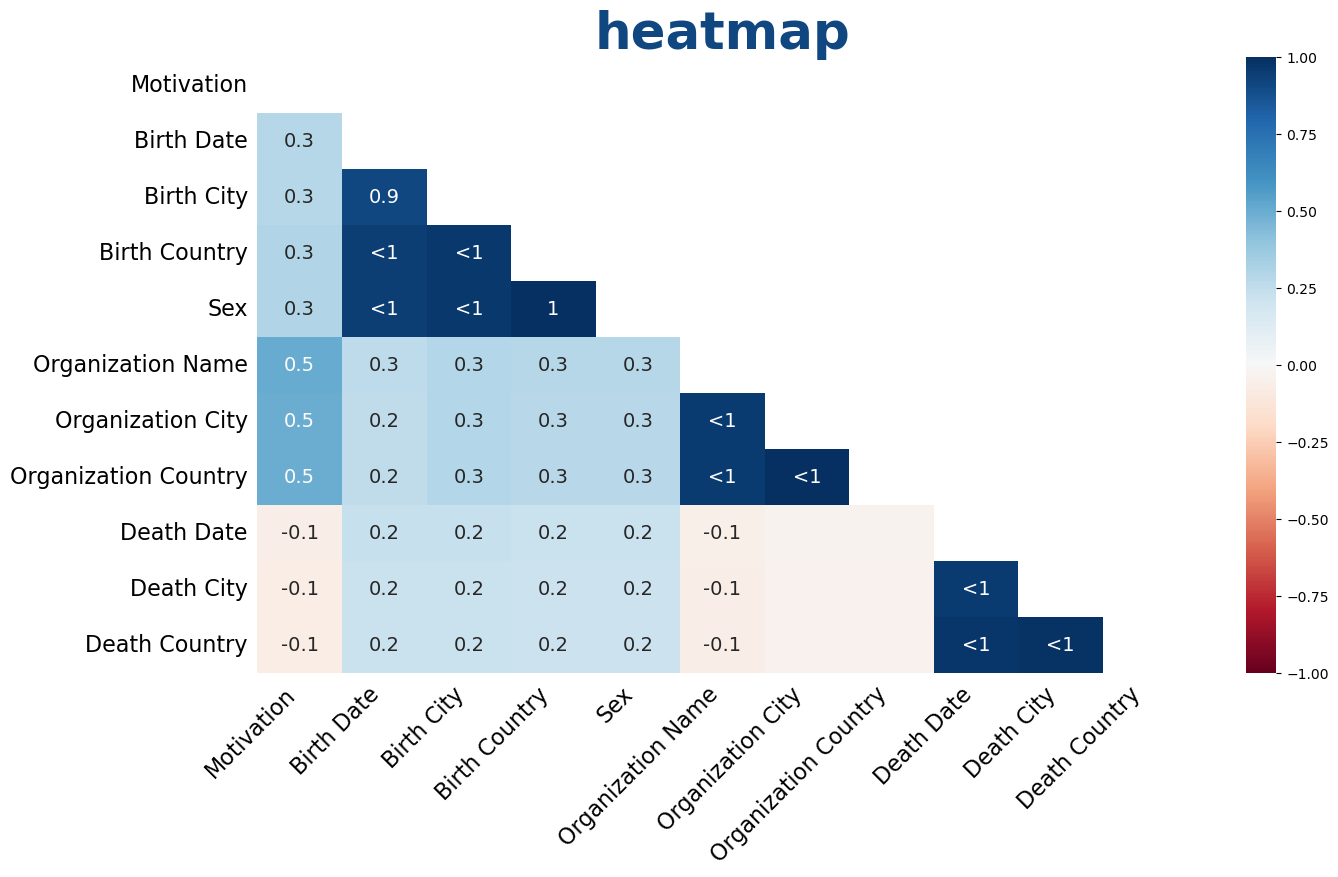

In [9]:
msno.heatmap(data, figsize = (15, 8))
plt.title("heatmap", fontsize = 37, weight = "bold", color = "#114781")
plt.show()

# Let is find the most Nobel of Prizes


In [10]:
data['Category'].value_counts()

Medicine      227
Physics       222
Chemistry     194
Peace         130
Literature    113
Economics      83
Name: Category, dtype: int64

From this we can say that the most prizes are awarded in <b> Medicine </b> field.

# Who gets the Nobel Prize?

In [11]:
data['Laureate Type'].value_counts()

Individual      939
Organization     30
Name: Laureate Type, dtype: int64

This is shows that the Nobel Prize is awarded either to <b> individuals </b> or an <b> organizations </b>.

# USA dominance

In [12]:
data['Birth Country'].value_counts().head(10)

United States of America    276
United Kingdom               88
Germany                      70
France                       53
Sweden                       30
Japan                        29
Russia                       20
Netherlands                  19
Canada                       18
Italy                        18
Name: Birth Country, dtype: int64

***** The majority of Prize winners are born in the USA  

# What is the gender of a typical Nobel Prize winner?

In [13]:
Gender_count = data['Sex'].value_counts()
Gender_count

Male      893
Female     50
Name: Sex, dtype: int64

Its not suprised that the most prizes awarded to male than female, as the first Nobel Prize was handed out in 1901, and at that time the prize was male-focused.

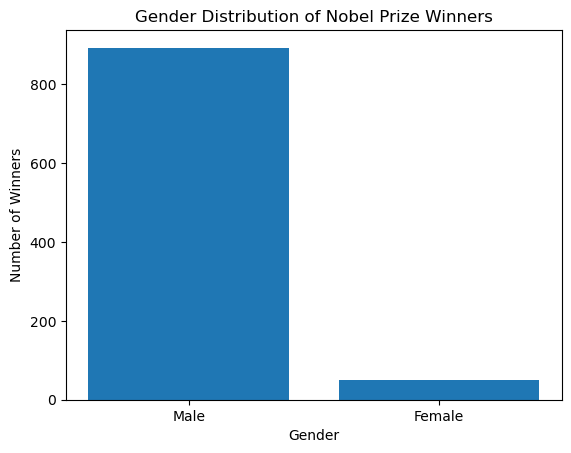

In [14]:
# Create a bar chart
plt.bar(Gender_count.index, Gender_count.values)
# add chart title and axis labels
plt.title("Gender Distribution of Nobel Prize Winners")
plt.xlabel("Gender")
plt.ylabel("Number of Winners")
# show the chart
plt.show()

# The first woman to win the Nobel Prize

In [15]:
# Find all female winners
data["female_winner"] = data["Sex"]=="Female"

In [16]:
data[data["female_winner"]].head(5)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,True
52,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,True
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,True
129,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,True


In [17]:
#Find the first woman won the price
data[data["female_winner"]].nsmallest(1,'Year')

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,True


The fist female won the Nobel Prize in 1903, she was from Poland.

# Repeat laureates

In [18]:
# Selecting the laureates that have received 2 or more prizes.
data.groupby('Full Name').filter(lambda num:len(num)>=2)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,True
46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Goettingen University,Göttingen,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False
47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,"""in recognition of their work on immunity""",1/2,302,Individual,Paul Ehrlich,1854-03-14,Strehlen (Strzelin),Prussia (Poland),Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,1915-08-20,Bad Homburg vor der Höhe,Germany,False
63,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,True
90,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2014,Physics,The Nobel Prize in Physics 2014,"""for the invention of efficient blue light-emi...",1/3,906,Individual,Isamu Akasaki,1929-01-30,Chiran,Japan,Male,Nagoya University,Nagoya,Japan,NaN,NaN,NaN,False
945,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Male,Francis Crick Institute,Hertfordshire,United Kingdom,NaN,NaN,NaN,False
946,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,921,Individual,Tomas Lindahl,1938-01-28,Stockholm,Sweden,Male,Clare Hall Laboratory,Hertfordshire,United Kingdom,NaN,NaN,NaN,False
947,2015,Chemistry,The Nobel Prize in Chemistry 2015,"""for mechanistic studies of DNA repair""",1/3,922,Individual,Paul Modrich,1946-06-13,"Raton, NM",United States of America,Male,Howard Hughes Medical Institute,"Durham, NC",United States of America,NaN,NaN,NaN,False


This is shows that there are 19  lucky winners have got the prize twice. 

# How old are they when they get the prize?

In [19]:
from datetime import datetime

# calculate the age of each winner at the time of the award
# handle invalid birth_date values
data.loc[data['Birth Date'] == '1898-00-00', 'Birth Date'] = '1898-01-01'
#handle invalid birth_date values
data.loc[data['Birth Date'] == '1943-00-00', 'Birth Date'] = '1943-01-01'

ages = []
for index, row in data.iterrows():
    if not pd.isna(row['Birth Date']):
        birth_date = datetime.strptime(row['Birth Date'], '%Y-%m-%d')
        award_date = datetime.strptime(str(row['Year']), '%Y')
        if not pd.isna(row['Death Date']):
            death_date = datetime.strptime(row['Death Date'], '%Y-%m-%d')
            age = (death_date - birth_date).days / 365.25
        else:
            age = (award_date - birth_date).days / 365.25
        ages.append(age)

# print out the average age of winners
print('Average age of Nobel Prize winners: {:.2f}'.format(sum(ages) / len(ages)))

Average age of Nobel Prize winners: 72.62


Let is visualize the age distribution of Nobel Prize winners using seaborn, by creating a histogram using the sns.histplot() function.

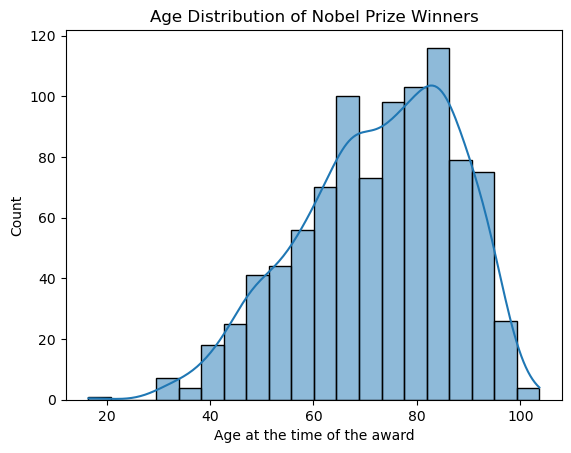

In [20]:
# create a histogram of age distribution using seaborn
sns.histplot(data=ages, bins=20, kde=True)

# set the title and x-label for the plot
plt.title('Age Distribution of Nobel Prize Winners')
plt.xlabel('Age at the time of the award')

# show the plot
plt.show()

# How long Nobel Prize winners lived?
We can subtract their birth date from their death date (if it exists) or from the current date (if they are still alive) to get their lifespan.

In [21]:
# calculate the lifespan of each winner
lifespans = []
for index, row in data.iterrows():
    birth_date_str = str(row['Birth Date']).replace('nan', '1900-01-01')
    birth_date = datetime.strptime(birth_date_str, '%Y-%m-%d')
    if pd.notnull(row['Death Date']):
        death_date = datetime.strptime(str(row['Death Date']), '%Y-%m-%d')
        lifespan = (death_date - birth_date).days / 365.25
    else:
        lifespan = (datetime.now() - birth_date).days / 365.25
    lifespans.append(lifespan)

# add the lifespan column to the dataframe
data['lifespan'] = lifespans

# print the lifespan statistics
print(data['lifespan'].describe())

count    969.000000
mean      81.893460
std       13.000748
min       25.815195
25%       74.458590
50%       82.277892
75%       89.451061
max      123.340178
Name: lifespan, dtype: float64


In [22]:
# check the lifespan column added to the dataframe using df['lifespan'] = lifespans.
data

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,female_winner,lifespan
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,58.496920
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,68.476386
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,63.041752
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,82.475017
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,90.061602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2016,Medicine,The Nobel Prize in Physiology or Medicine 2016,"""for his discoveries of mechanisms for autophagy""",1/1,927,Individual,Yoshinori Ohsumi,1945-02-09,Fukuoka,Japan,Male,Tokyo Institute of Technology,Tokyo,Japan,NaN,NaN,NaN,False,78.234086
965,2016,Peace,The Nobel Peace Prize 2016,"""for his resolute efforts to bring the country...",1/1,934,Individual,Juan Manuel Santos,1951-08-10,Bogotá,Colombia,Male,NaN,NaN,NaN,NaN,NaN,NaN,False,71.737166
966,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/2,928,Individual,David J. Thouless,1934-09-21,Bearsden,United Kingdom,Male,University of Washington,"Seattle, WA",United States of America,NaN,NaN,NaN,False,88.621492
967,2016,Physics,The Nobel Prize in Physics 2016,"""for theoretical discoveries of topological ph...",1/4,929,Individual,F. Duncan M. Haldane,1951-09-14,London,United Kingdom,Male,Princeton University,"Princeton, NJ",United States of America,NaN,NaN,NaN,False,71.641342


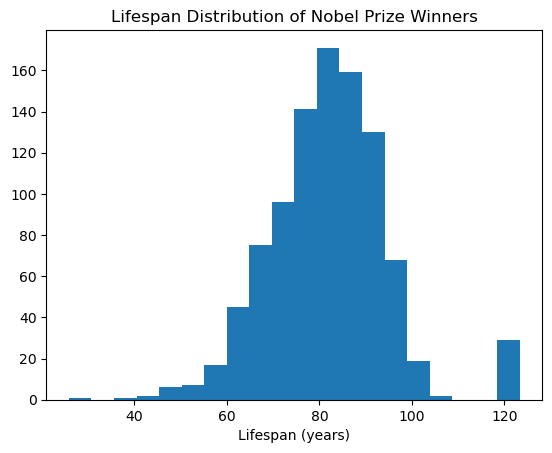

In [23]:
# create a histogram of lifespan distribution using matplotlib
plt.hist(lifespans, bins=20)

# set the title and x-label for the plot
plt.title('Lifespan Distribution of Nobel Prize Winners')
plt.xlabel('Lifespan (years)')

# show the plot
plt.show()

This histogram shows the lifespan of Nobel Prize winners, majority of the winners between 72 to 82 years. 

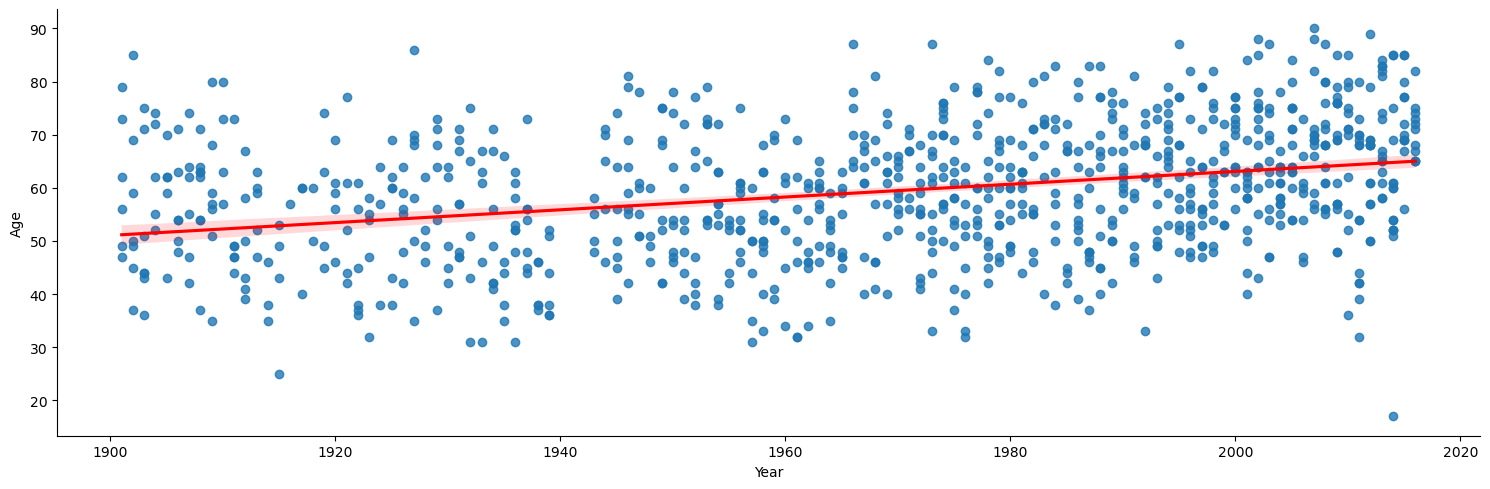

In [28]:
# Converting birth_date from String to datetime
data['Birth Date'] = pd.to_datetime(data['Birth Date'], format = '%Y-%m-%d', errors='coerce')

# Calculating the age of  winners
data['Age'] = data['Year'] - (data['Birth Date'].dt.year)

# Plotting the age of Nobel Prize winners
sns.lmplot(x='Year', y='Age', data=data, aspect=3,line_kws = {'color' : 'red'})

# Age differences between prize categories

<AxesSubplot:xlabel='Category', ylabel='age_at_award'>

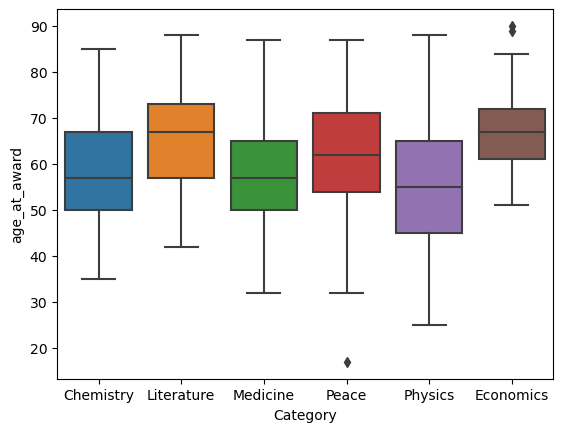

In [29]:
# convert birth_date column to datetime object
data['Birth Date'] = pd.to_datetime(data['Birth Date'])

# extract the year from the birth_date column and store it as a new column
data['Birth_year'] = data['Birth Date'].dt.year

# calculate the age of each winner at the time they received the prize
data['age_at_award'] = data['Year'] - data['Birth_year']

# create a box plot of age differences by prize category
sns.boxplot(x='Category', y='age_at_award', data=data)


# Oldest and youngest winners

In [30]:
# The oldest winner of a Nobel Prize 
display(data.nlargest(1,'Age'))

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization City,Organization Country,Death Date,Death City,Death Country,female_winner,lifespan,Birth_year,age_at_award,Age
825,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,90.841889,1917.0,90.0,90.0


The oldest winner of Nobel was in Economics at 90, when she recieved the Prize. That is why Leonid Hurwicz is the oldest winner among 969.

In [31]:
# The youngest winner of a Nobel Prize as of 2016
display(data.nsmallest(1,'Age'))

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Organization City,Organization Country,Death Date,Death City,Death Country,female_winner,lifespan,Birth_year,age_at_award,Age
940,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,True,25.815195,1997.0,17.0,17.0


And the youngest winner was awarded in Peasce to Malala Yousafzai, she was only 17 years old in 2014.

# Web Scraping 

In [32]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import html5lib

In [33]:
url = "https://www.britannica.com/topic/Nobel-Prize-Winners-by-Year-1856946"
html_data = requests.get(url).text

In [34]:
soup = BeautifulSoup(html_data, "html.parser")

In [17]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 7.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.9/384.9 kB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

# Set the URL of the webpage to be scraped
url = "https://www.britannica.com/topic/Nobel-Prize-Winners-by-Year-1856946"

# Set up Selenium with headless Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless")
driver = webdriver.Chrome(options=chrome_options)

# Load the webpage with Selenium
driver.get(url)

# Wait for the table to load, up to a maximum of 10 seconds
driver.implicitly_wait(10)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(driver.page_source, "html.parser")

# Find the table tag containing the Nobel Prize winners
table = soup.find("table")

if table:
    # Find the tbody tag inside the table
    tbody = table.find("tbody")

    # Extract the data from the tbody and print it
    for row in tbody.find_all("tr"):
        cells = row.find_all("td")
        if cells:
            year, category, name = [cell.get_text(strip=True) for cell in cells]
            print(f"{year}\t{category}\t{name}")
else:
    print("Table not found.")

# Close the Selenium driver
driver.quit()

In [ ]:
nobel_winners = pd.DataFrame(columns=["Year", "Category", "Name", "Country"])

for row in soup.find_all("tbody").find_all('tr'):
    col = row.find_all("td")
    year = col[0].text
    category = col[1].text
    name = col[2].text
    country = col[3].text
    nobel_winners = nobel_winners.append({"Date": date, "Category": category, "Name": name, "Country": country}, ignore_index=True)  